# Mini-Project 4

Welcome to your fourth Mini Project! You will build an RNN model to classify text and an LSTM model for anomaly detection (also outlier detection) on the temperature sensor data. **Please complete your assignment in this Jupyter Notebook.**

---

**Requirements**: 
- Pytorch is allowed to implement your models.
- Your code should follow [PEP 8](https://www.python.org/dev/peps/pep-0008/) with necessary comments.

In [1]:
# Set import path to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Task 1: Text Classification

This task aims to train a sentiment analysis model to classify given sentences as **positive or negative**, based on the Recurrent Neural Network.

---

**Tasks**

1. Explore data
    - Load the training data and the test data.
    - Extract labels and texts which are seperated by the string of `" +++$+++ "`.
    - Eliminate index information in the test data so that you can get pure sentences.
    - Print out the first 10 examples of your training set and test set.
2. Preprocess data
    - Tokenize the data and convert the text to sequences.
    - Add padding to ensure that all the sequences have the same shape.
    - **Hint**: click [here](https://github.com/PetrochukM/PyTorch-NLP) for more information.
3. Prepare your data for training and testing with DataLoaders
    - Use the preprocesed data to create the [Custom Dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files) 
    - Prepare your data for training with [DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders)
3. Build RNN model
    - Build a RNN based on Pytorch.
    - Visualize the model using [PyTorchViz](https://github.com/szagoruyko/pytorchviz).
    - **Hint**: click [here](https://blog.floydhub.com/a-beginners-guide-on-recurrent-neural-networks-with-pytorch/) for more information.
4. Train model
    - Initialize hyperparameters.
    - Train your model.
    - Visualize the performance including training loss, training accuracy, validation loss, and validation accuracy.
5. Predict
    - Test your model on the test data.
    - Save the predicted results (labels and texts) in a CSV file and submit it to Canvas.


### Task 1.1: Explore Data

In [2]:
import numpy as np
import re

In [3]:
# Load data
def LoadDataTask1(data_dir):
    """
        Load train and test data from the given directory. 
        
        Parameters
        ----------
        data_dir: str
            Absolute path of data directory.

        Return
        ----------
        train_data: ndarray
            Training data features (text (str)) and labels (sentiment {0, 1}).
        test_data: ndarray
            Testing data (text (str)).
    """

    # Load train data
    train_data = [[],[]] # Empty list to store training data features (text) and labels (sentiment {0, 1})
    with open(data_dir + "task1_training_data.txt") as train_data_file: # Open train data file in `read` mode (default)
        for data in train_data_file: # Parse each line of the dataset
            strip = data.strip().split(' +++$+++ ') # Strip the text line (remove white-spaces) and split it at ' +++$+++ '
            text = strip[-1] # Extract features (text (str))
            sentiment = strip[0] # Extract labels (sentiment {0, 1})
            train_data[0].append(text) # Append train features (text (str)) to the list
            train_data[1].append(int(sentiment)) # Append train labels (sentiment {0, 1}) to the list
    train_data = np.asarray(train_data) # Convert list to ndarray

    # Loat test data
    test_data = [] # list for storing testing data
    with open(data_dir + "task1_test_data.txt") as test_data_file: # Open test data file in `read` mode (default)
        for data in test_data_file: # Parse each line of the dataset
            strip = data.strip() # Strip the text line (remove white-spaces)
            non_idx = re.split('(\d+,)', strip)[-1] # Remove index (unwanted)
            test_data.append(non_idx) # Append test features (text (str)) to the list
    test_data = test_data[1:] # Slice data (remove headers)
    train_data = np.asarray(train_data) # Convert list to ndarray

    return train_data, test_data

# View data
def ViewDataTask1(train_data, test_data, train_min_idx, train_max_idx, test_min_idx, test_max_idx):
    """
        View train and test data within the given index limits. 
        
        Parameters
        ----------
        train_data: ndarray
            Training data features (text) and labels (sentiment {0, 1}).
        test_data: ndarray
            Testing data (text).
        train_min_idx: int
            Minimum index to sample train data starting at.
        train_max_idx: int
            Maximum index to sample train data ending at.
        test_min_idx:
            Minimum index to sample test data starting at.
        test_max_idx:
            Maximum index to sample test data ending at.

        Return
        ----------
        None.
    """

    # Train data
    print('First {} Examples of Train Set:'.format(train_max_idx-train_min_idx+1)) # Header
    for i in range(train_min_idx, train_max_idx+1):
        print('Sentiment: {}\tText: {}'.format(train_data[1][i],
                                               train_data[0][i])) # Print out `n` examples of train data
    print('\nFirst {} Examples of Test Set:'.format(test_max_idx-test_min_idx+1)) # Header
    for i in range(train_min_idx, train_max_idx+1):
        print('Text: {}'.format(test_data[i])) # print out `m` examples of test data

In [4]:
# Data directory
data_dir = "gdrive/My Drive/AuE-8930 Deep Learning/Mini-Project 4/"

# Load data
train_data, test_data = LoadDataTask1(data_dir)

# View data
ViewDataTask1(train_data, test_data, train_min_idx=0, train_max_idx=9, test_min_idx=0, test_max_idx=9)

First 10 Examples of Train Set:
Sentiment: 1	Text: are wtf ... awww thanks !
Sentiment: 1	Text: leavingg to wait for kaysie to arrive myspacin itt for now ilmmthek .!
Sentiment: 0	Text: i wish i could go and see duffy when she comes to mamaia romania .
Sentiment: 1	Text: i know eep ! i can ' t wait for one more day ....
Sentiment: 0	Text: so scared and feeling sick . fuck ! hope someone at hr help ... wish it would be wendita or karen .
Sentiment: 0	Text: my b day was thurs . i wanted 2 do 5 this weekend for my b day but i guess close enough next weekend . going alone
Sentiment: 1	Text: e3 is in the trending topics only just noticed ive been tweeting on my iphone until now
Sentiment: 1	Text: where did you get him from i know someone who would love that !
Sentiment: 0	Text: dam just got buzzed by another huge fly ! this time it landed on my head ... not impressed
Sentiment: 1	Text: tomorrowwwwwwwww !!! you ' ll love tomorrow ' s news !

First 10 Examples of Test Set:
Text: my dog ate ou

### Task 1.2: Preprocess Data

In [5]:
!pip install pytorch-nlp
from torchnlp.encoders.text import WhitespaceEncoder
from torchnlp.encoders.text import stack_and_pad_tensors
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # set device

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Preprocess train features (text (str))
train_encoder = WhitespaceEncoder(train_data[0]) # Initialize tokenizer and encoder
train_encoded_data = [train_encoder.encode(example) for example in train_data[0]] # Tokenize and encode
train_feature_data = stack_and_pad_tensors(train_encoded_data)[0] # Add padding
print('Train Feature Data: {}'.format(train_feature_data.shape)) # Verify shape

# Preprocess train labels (sentiment {0, 1})
train_label_data = torch.from_numpy(train_data[1].astype(np.int8)) # Convert Numpy array to PyTorch tensor
print('Train Label Data: {}'.format(train_label_data.shape)) # Verify shape

# Preprocess test data (text (str))
test_encoder = WhitespaceEncoder(test_data) # Initialize tokenizer and encoder
test_encoded_data = [test_encoder.encode(example) for example in test_data] # Tokenize and encode
test_feature_data = stack_and_pad_tensors(test_encoded_data)[0] # Add padding
print('Test Feature Data: {}'.format(test_feature_data.shape)) # Verify shape

Train Feature Data: torch.Size([200000, 39])
Train Label Data: torch.Size([200000])
Test Feature Data: torch.Size([200000, 39])


### Task 1.3: Prepare Data for Training and Testing with DataLoaders

In [7]:
from torch.utils.data import Dataset, DataLoader

Data Creation Class

In [8]:
class create_data(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = data # Member variable to store data (features)
        self.target = target # Member variable to store targets (labels)
        self.transform = transform # Member variable to store transform
    def __getitem__(self, idx):
        x = self.data[idx] # Get feature corresponding to `idx`
        y = self.target[idx] # Get label corresponding to `idx`
        if self.transform:
            x = self.transform(x) # Apply transform
        return x, y
    def __len__(self):
        return len(self.data) # Get dataset size

Train-Valid-Test Split

In [9]:
train_size  = 0.8 # Reserve 80% data for training

# Split features (text (str)) into train and valid sets
X_train, X_valid = torch.utils.data.random_split(train_feature_data,
                                                 [train_size, 1-train_size],
                                                 generator=torch.Generator().manual_seed(101))

# Split labels (sentiment {0, 1}) into train and valid sets
y_train, y_valid = torch.utils.data.random_split(train_label_data,
                                                 [train_size, 1-train_size],
                                                 generator=torch.Generator().manual_seed(101))

# Load test set
X_test, y_test = test_feature_data, torch.tensor([0]*len(test_feature_data))

Create Datasets and DataLoaders

In [10]:
num_workers = 2 # Sub-processes for DataLoader
batch_size  = 64 # Batch size

# Train set
train_set = create_data(X_train, y_train) # Create dataset
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers,
                          pin_memory=torch.cuda.is_available()) # Define DataLoader
print('Train DataLoader: {}'.format(len(train_loader.dataset))) # Verify shape

# Valid set
valid_set = create_data(X_valid, y_valid) # Create dataset
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers,
                          pin_memory=torch.cuda.is_available()) # Define DataLoader
print('Valid DataLoader: {}'.format(len(valid_loader.dataset))) # Verify shape

# Test set
test_set = create_data(X_test, y_test) # Create dataset
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True,
                         num_workers=num_workers,
                         pin_memory=torch.cuda.is_available()) # Define DataLoader
print('Test DataLoader: {}'.format(len(test_loader.dataset))) # Verify shape

Train DataLoader: 160001
Valid DataLoader: 39999
Test DataLoader: 200000


### Task 1.4: Build RNN Model

In [11]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
!pip install torchviz
from torchviz import make_dot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


RNN Model Class

In [12]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_layers, hidden_dim, output_dim):
        super(RNN, self).__init__()

        self.num_layers = num_layers
        self.hidden_dim = hidden_dim

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(input_size=embedding_dim, hidden_size=self.hidden_dim,
                          num_layers=self.num_layers, batch_first=True)
        self.dropout1 = nn.Dropout(0.4)
        self.pooling = nn.AdaptiveAvgPool1d(1)
        self.dropout2 = nn.Dropout(0.4)
        self.fc1 = nn.Linear(hidden_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        x = self.embedding(x)
        x, _ = self.rnn(x, h0)
        x = self.dropout1(x)
        x = x.permute(0, 2, 1)
        x = self.pooling(x)
        x = x.squeeze(-1)
        x = self.dropout2(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x.squeeze(1)

Visualize RNN Model

RNN(
  (embedding): Embedding(82950, 128)
  (rnn): RNN(128, 128, batch_first=True)
  (dropout1): Dropout(p=0.4, inplace=False)
  (pooling): AdaptiveAvgPool1d(output_size=1)
  (dropout2): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


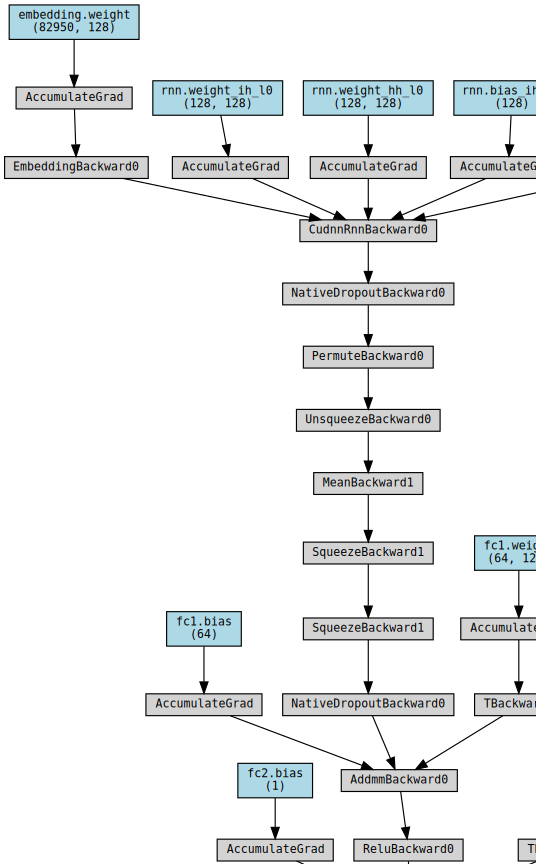

In [13]:
vocab_size = train_encoder.vocab_size # Size of vocabulary
embedding_dim = 128 # Embedding dimension
num_layers = 1 # Hidden layers
hidden_dim = 128 # Hidden units
output_dim = 1 # Outputs
model = RNN(vocab_size=vocab_size, embedding_dim=embedding_dim,
            num_layers=num_layers, hidden_dim=hidden_dim,
            output_dim=output_dim).to(device) # Load RNN model with given hyperparameters

print(model) # Print model

for batch in train_loader:
    x, y = batch
    break
x = x.to(device) # PyTorch compatible input features
y = model(x) # Run predictions on inputs
make_dot(y, params=dict(model.named_parameters()), show_attrs=False, show_saved=False) # Generate visualization of PyTorch execution graphs and traces

### Task 1.5: Training

In [14]:
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

Train Model

In [15]:
vocab_size = train_encoder.vocab_size # Size of vocabulary
embedding_dim = 128 # Embedding dimension
num_layers = 3 # Hidden layers
hidden_dim = 128 # Hidden units
output_dim = 1 # Outputs
model = RNN(vocab_size=vocab_size, embedding_dim=embedding_dim,
            num_layers=num_layers, hidden_dim=hidden_dim,
            output_dim=output_dim).to(device) # Load RNN model withh given hyperparameters
criterion = nn.BCEWithLogitsLoss() # Loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Optimizer
num_epochs = 15 # Epochs
batches_per_epoch = len(X_train) // batch_size # Batches per epoch

train_loss_hist = [] # Empty list to store training loss history
train_acc_hist = [] # Empty list to store training accuracy history
val_loss_hist = [] # Empty list to store validation loss history
val_acc_hist = [] # Empty list to store validation accuracy history

for epoch in range(num_epochs):
    epoch_loss = 0.0
    correct_preds = 0
    total_preds = 0

    # Training
    model.train() # Set model in training mode
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar: # Set progress bar
        bar.set_description(f"Epoch {epoch+1} Train") # Progress bar description (current epoch number)
        for i, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            # Forward propagation
            outputs = model(inputs) # Get prediction
            loss = criterion(outputs, labels.float()) # Compute training loss
            # Backward propagation
            optimizer.zero_grad() # Set the gradients of all optimized tensors to zero
            loss.backward() # Compute gradients w.r.t. loss
            # Update parameters
            optimizer.step() # Update parameters based on gradients and update law for given optimizer
            # Compute metrics (accuracy and loss)
            preds = (outputs > 0.5).long() # Training predictions
            correct_preds += (preds == labels).sum().item() # Add correct training predictions
            total_preds += len(labels) # Add total training predictions
            epoch_loss += loss.item() # Add epoch loss
            bar.update(1) # Update progress bar
            bar.set_postfix(
                acc=round(float(correct_preds/total_preds),4), # Print current loss value after progress bar
                loss=round(float(loss.item()),4) # Print current loss value after progress bar
            )
    epoch_loss /= len(train_loader) # Average training loss value
    epoch_acc = correct_preds / total_preds # Average epoch accuracy
    train_loss_hist.append(epoch_loss) # Store training loss
    train_acc_hist.append(epoch_acc) # Store training accuracy

    # Validation
    model.eval() # Set model in evaluation mode
    with torch.no_grad():
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        for val_inputs, val_labels in valid_loader:
            val_inputs = val_inputs.to(device)
            val_labels = val_labels.to(device)
            val_outputs = model(val_inputs) # Get predictions on valid set
            loss = criterion(val_outputs, val_labels.float()) # Validation loss
            # Compute metrics (accuracy and loss)
            val_preds = (val_outputs > 0.5).long() # Validation predictions
            val_correct_preds += (val_preds == val_labels).sum().item() # Add correct validation predictions
            val_total_preds += len(val_labels) # Add total validation predictions
            val_loss += loss.item() # Add validation loss
        val_loss /= len(valid_loader) # Average validation loss value
        val_acc = val_correct_preds / val_total_preds # Average validation accuracy
        val_loss_hist.append(val_loss) # Store validation loss
        val_acc_hist.append(val_acc) # Store validation accuracy
        print(f"Epoch {epoch+1} Valid: acc={round(val_acc,4)}, loss={round(val_loss,4)}") # Print validation accuracy and loss

Epoch 1 Train: : 2501batch [00:45, 54.69batch/s, acc=0.506, loss=0.693]


Epoch 1 Valid: acc=0.4973, loss=0.6896


Epoch 2 Train: : 2501batch [00:36, 69.08batch/s, acc=0.513, loss=0.664]


Epoch 2 Valid: acc=0.5787, loss=0.6759


Epoch 3 Train: : 2501batch [00:37, 65.91batch/s, acc=0.552, loss=1.12]


Epoch 3 Valid: acc=0.5759, loss=0.6825


Epoch 4 Train: : 2501batch [00:36, 68.26batch/s, acc=0.585, loss=0.693]


Epoch 4 Valid: acc=0.5836, loss=0.6763


Epoch 5 Train: : 2501batch [00:36, 68.79batch/s, acc=0.595, loss=0.381]


Epoch 5 Valid: acc=0.5918, loss=0.6753


Epoch 6 Train: : 2501batch [00:36, 67.97batch/s, acc=0.604, loss=0.693]


Epoch 6 Valid: acc=0.5958, loss=0.6741


Epoch 7 Train: : 2501batch [00:36, 68.42batch/s, acc=0.609, loss=0.319]


Epoch 7 Valid: acc=0.5946, loss=0.6722


Epoch 8 Train: : 2501batch [00:36, 68.66batch/s, acc=0.613, loss=0.693]


Epoch 8 Valid: acc=0.5996, loss=0.6729


Epoch 9 Train: : 2501batch [00:36, 68.12batch/s, acc=0.61, loss=0.69]


Epoch 9 Valid: acc=0.5296, loss=0.6857


Epoch 10 Train: : 2501batch [00:36, 68.40batch/s, acc=0.622, loss=1.31]


Epoch 10 Valid: acc=0.5862, loss=0.6737


Epoch 11 Train: : 2501batch [00:37, 67.51batch/s, acc=0.607, loss=0.686]


Epoch 11 Valid: acc=0.5729, loss=0.6686


Epoch 12 Train: : 2501batch [00:36, 68.84batch/s, acc=0.637, loss=0.315]


Epoch 12 Valid: acc=0.6813, loss=0.6385


Epoch 13 Train: : 2501batch [00:37, 65.98batch/s, acc=0.678, loss=0.693]


Epoch 13 Valid: acc=0.6594, loss=0.6482


Epoch 14 Train: : 2501batch [00:37, 66.34batch/s, acc=0.703, loss=0.327]


Epoch 14 Valid: acc=0.7148, loss=0.6299


Epoch 15 Train: : 2501batch [00:36, 68.22batch/s, acc=0.71, loss=0.322]


Epoch 15 Valid: acc=0.6696, loss=0.6447


Visualize Model Performance

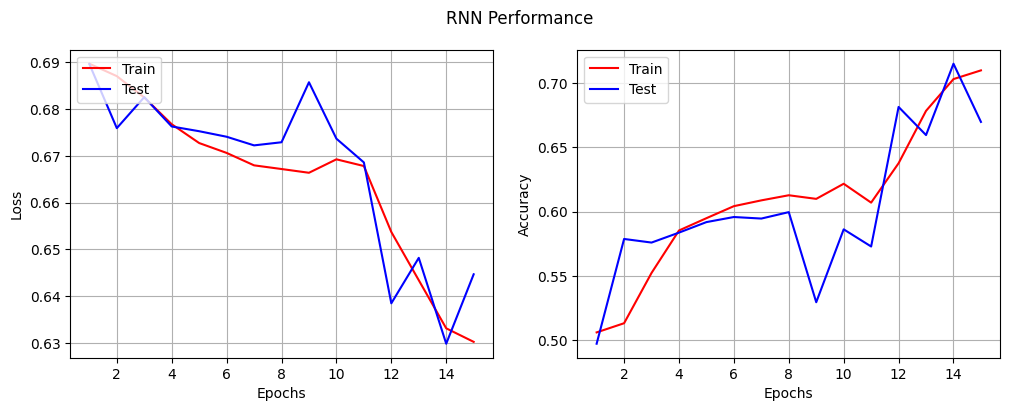

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) # Create side-by-side subplots
fig.suptitle('RNN Performance') # Common plot title
# Plot loss curves
ax1.plot(np.linspace(1, num_epochs, num_epochs), train_loss_hist, label='Train', color='red') # Plot train loss
ax1.plot(np.linspace(1, num_epochs, num_epochs), val_loss_hist, label='Test', color='blue') # Plot test loss
ax1.legend(loc='upper left') # Show legend
ax1.set_xlabel('Epochs') # Show label for X-axis
ax1.set_ylabel('Loss') # Show label for Y-axis
ax1.grid(True) # Show grid
# Plot accuracy curves
ax2.plot(np.linspace(1, num_epochs, num_epochs), train_acc_hist, label='Train', color='red') # Plot train accuracy
ax2.plot(np.linspace(1, num_epochs, num_epochs), val_acc_hist, label='Test', color='blue') # Plot test accuracy
ax2.legend(loc='upper left') # Show legend
ax2.set_xlabel('Epochs') # Show label for X-axis
ax2.set_ylabel('Accuracy') # Show label for Y-axis
ax2.grid(True) # Show grid

### Task 1.6: Prediction

In [17]:
# Evaluate model
model.eval() # Set model in evaluation mode
with torch.no_grad():
    test_preds = []
    for test_inputs, _ in test_loader:
        test_inputs = test_inputs.to(device)
        test_outputs = model(test_inputs) # Get predictions on test set
        test_preds_batch = (test_outputs > 0.5).long().cpu().numpy()
        test_preds.extend(test_preds_batch)

# Combine predicted labels and input texts
test_results = []
for i in range(len(test_data)):
    test_results.append(str(test_preds[i]) + ',' + test_data[i].strip('"') + '\n') # Append test results

# Write to CSV file
with open(data_dir + 'task_1_results.csv', 'w') as f: # Create and open CSV file with write permissions
    for result in test_results:
        f.write(result) # Write test results
print("Saved results!")

Saved results!


## Task 2: Anomaly Detection

In manufacturing industries, the anomaly detection technique is applied to predict the abnormal activities of machines based on the data read from sensors. In machine learning and data mining, anomaly detection is the task of identifying the rare items, events, or observations that are suspicious and seem different from the majority of the data. In this task, you will predict the possible failure of the system based on the temperature data. And this failure can be detected by check if they follow the trend of the majority of the data.

---

**Dataset**

The given dataset (`ambient_temperature_system_failure.csv`) is a part of Numenta Anomaly Benchmark (NAB) dataset, which is a novel benchmark for evaluating machine learning algorithms in anomaly detection.

**Tasks**

Because the labels have not been given, you will need to use a LSTM based model to capture the trend of the feature for majority of the data. First, extract $n_x$ features from each of the raw data point. Second, create a sliding window with length $l$. Third, fomulate LSTM taking a matrix of shape $l \times n_x$ as the input to predict the temperature value of the next time step $l+1$. Last, compare the predicted result and the real data and find out abnormal points where the difference between these two values are larger than the threshold. 

For instance, if we want to extract 3 features ($n_x=3$), and set the sliding window length to 100 ($l=100$). Then LSTM will take the first 100 (e.g., $[0:100]$) time step data as the input to predict the temperature value of the next time step (e.g., 100). The shape of the input will be $100 \times 3$, and shape of the output will be a single number.

1. Load data
    - Read the CSV file.
    - Draw a curve to visualize the time-series data.
2. Preprocess data
    - The raw data of temperature is the degree Fahrenheit, you will need to convert it into degree Celcius.
    - Use Pandas package convert string timestamp data into the datatime data. Click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for details.
3. Feature Engineering
    - We will use datatime data to generate four features: hours, day or night, day of the week, weekday or weekends.
    - Hour: convert datetime data into hours. The result of your processed data will be [0, 1, 2, ..., 22, 23, 0, 1, ..., 22, 23]. Check [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html).
    - Day or night: this will be a binary data. 7:00-22:00 will be day time, the rest will be night.
    - Day of the week: convert datetime data into day of the week. The result of your processed data will be [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6 ...]. Click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html) for more information.
    - Workday or weekend: this will be a binary data. Monday to Friday will be workdays, Saturday and Sunday are weekend.
    
4. Prepare training and testing dataloaders
    - Split the dataset into training set and test set.
    - Min-max normalization.
    - Generate sliding window (similar to the last task of HW1) data.
    - Use the preprocessed data to create the [Custom Dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial).
    - Prepare your data for training and testing with [DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders).
3. Build LSTM model
    - Build an LSTM model using Pytorch.
    - Visualize your model.
4. Train model
    - Initialize hyperparameters.
    - Train the model.
    - Evaluate the trained model on the test data.
    - Visualize the performance including training loss and test loss.
5. Find anomalies
    - Specify the threshold and predict anomalies on testing dataset.
    - Visualize the anomalies.


### Task 1.1: Load Data

In [18]:
import pandas as pd
import plotly.express as px

In [19]:
# Data directory
data_dir = "gdrive/My Drive/AuE-8930 Deep Learning/Mini-Project 4/"

In [20]:
df = pd.read_csv(data_dir + 'ambient_temperature_system_failure.csv') # Read CSV file
fig = px.line(df, x='timestamp', y='value') # Plot data
fig.show() # Show plot

### Task 1.2: Preprocess Data

In [21]:
df['value'] = (df['value']-32)*5/9 # Convert temprature from °F to °C
df['timestamp'] = pd.to_datetime(df['timestamp']) # Convert timestamp to datetime

### Task 1.3: Feature Engineering

In [22]:
df['hours'] = df['timestamp'].dt.hour # Extract hours (hr) from timestamp
df['shift'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int) # Extract shift (0=night, 1=day)
df['dayofweek'] = df['timestamp'].dt.dayofweek # Extract day of the week (0=Mon, ..., 6=Sun)
df['weekday'] = (df['dayofweek'] < 5).astype(int) # Decide weekday/weekend (0=weekend, 1=weekday)

### Task 1.4: Prepare Training and Testing DataLoaders

In [23]:
from sklearn.preprocessing import MinMaxScaler

Preprocessing

In [24]:
# Concatenate data
data = df[['value', 'hours', 'shift', 'dayofweek', 'weekday']]

# Normalize data
scaler = MinMaxScaler() # Initialize min-max scaler
scaler.fit(data[['value', 'hours', 'shift', 'dayofweek', 'weekday']]) # Fit data
data[['value', 'hours', 'shift', 'dayofweek', 'weekday']] = scaler.transform(data) # Transform data

<ipython-input-24-65f92613ae93>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Train-Test Split

In [25]:
test_size = (0.2 * len(data))
pred_time = 1
unroll_len = 250
test_cut = int(test_size + unroll_len  + 1)

# Train set
X_train = data[0:-pred_time-test_cut].values
y_train = data[pred_time:-test_cut]['value'].values

# Test set
X_test = data[0-test_cut:-pred_time].values
y_test = data[pred_time-test_cut:  ]['value'].values

# Sliding window approach
def sliding_window(data, seq_len=250):
    result = []
    for index in range(len(data)-seq_len):
        result.append(data[index:index+seq_len]) # Store result
    return np.asarray(result)
seq_len = 250 # Window sequence length to predict value of l+1th sample
X_train = sliding_window(X_train, seq_len) # Apply sliding window
y_train = y_train[-X_train.shape[0]:]
print('Train Feature Data: {}'.format(X_train.shape)) # Verify shape
X_test = sliding_window(X_test, seq_len) # Apply sliding window
y_test  = y_test[-X_test.shape[0]:]
print('Test Feature Data: {}'.format(X_test.shape)) # Verify shape

Train Feature Data: (5312, 250, 5)
Test Feature Data: (1453, 250, 5)


Data Creation Class

In [26]:
class create_data(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = data # Member variable to store data (features)
        self.target = target # Member variable to store targets (labels)
        self.transform = transform # Member variable to store transform
    def __getitem__(self, idx):
        x = self.data[idx] # Get feature corresponding to `idx`
        y = self.target[idx] # Get label corresponding to `idx`
        if self.transform:
            x = self.transform(x) # Apply transform
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.data) # Get dataset size

Create Datasets and DataLoaders

In [27]:
num_workers = 2 # Sub-processes for DataLoader
batch_size  = 64 # Batch size

# Train set
train_set = create_data(X_train, y_train) # Create dataset
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers,
                          pin_memory=torch.cuda.is_available()) # Define DataLoader
print('Train DataLoader: {}'.format(len(train_loader.dataset))) # Verify shape

# Valid set
valid_set = create_data(X_test, y_test) # Create dataset
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers,
                          pin_memory=torch.cuda.is_available()) # Define DataLoader
print('Valid DataLoader: {}'.format(len(valid_loader.dataset))) # Verify shape

Train DataLoader: 5312
Valid DataLoader: 1453


### Task 1.5: Build LSTM Model

LSTM Model Class

In [28]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout = nn.Dropout(p=0.2)
        self.linear = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = self.linear(out)
        return out

Visualize LSTM Model

LSTM(
  (lstm): LSTM(5, 128, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear): Linear(in_features=128, out_features=1, bias=True)
)


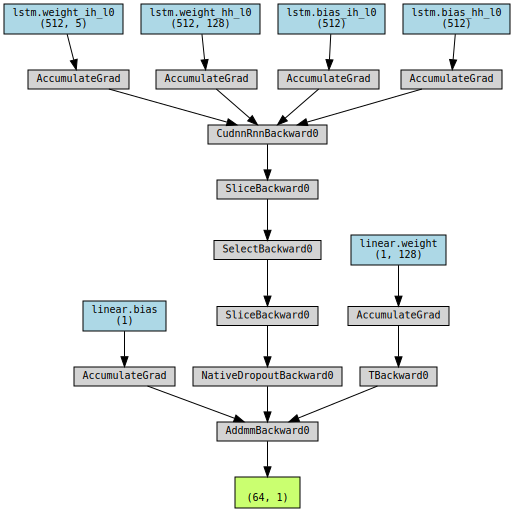

In [29]:
model = LSTM(input_size=5, hidden_size=128, output_size=1).to(device) # Load RNN model with given hyperparameters

print(model) # Print model

for batch in train_loader:
    x, y = batch
    break
x = x.to(device) # PyTorch compatible input features
y = model(x) # Run predictions on inputs
make_dot(y, params=dict(model.named_parameters()), show_attrs=False, show_saved=False) # Generate visualization of PyTorch execution graphs and traces

### Task 1.6: Training

Train Model

In [30]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0005)
num_epochs = 15 # Epochs
batches_per_epoch = len(X_train) // batch_size # Batches per epoch

train_loss_hist = [] # Empty list to store training loss history
val_loss_hist = [] # Empty list to store validation loss history

for epoch in range(num_epochs):
    train_loss = 0.0

    # Training
    model.train() # Set model in training mode
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar: # Set progress bar
        bar.set_description(f"Epoch {epoch+1} Train") # Progress bar description (current epoch number)
        for i, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            # Forward propagation
            outputs = model(inputs) # Get prediction
            loss = criterion(outputs.squeeze(), labels) # Compute training loss
            # Backward propagation
            optimizer.zero_grad() # Set the gradients of all optimized tensors to zero
            loss.backward() # Compute gradients w.r.t. loss
            # Update parameters
            optimizer.step() # Update parameters based on gradients and update law for given optimizer
            # Compute loss
            train_loss += loss.item() * inputs.size(0) # Add train loss
            bar.update(1) # Update progress bar
            bar.set_postfix(
                loss=round(float(loss.item()),4) # Print current loss value after progress bar
            )
    train_loss /= len(train_loader.dataset) # Average training loss value
    train_loss_hist.append(train_loss) # Store training loss

    # Validation
    model.eval() # Set model in evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_labels in valid_loader:
            val_inputs = val_inputs.to(device)
            val_labels = val_labels.to(device)
            val_outputs = model(val_inputs) # Get predictions on valid set
            loss = criterion(val_outputs.squeeze(), val_labels) # Validation loss
            # Compute loss
            val_loss += loss.item()*val_inputs.size(0) # Add validation loss
        val_loss /= len(valid_loader.dataset) # Average validation loss value
        val_loss_hist.append(val_loss) # Store validation loss
        print(f"Epoch {epoch+1} Valid: loss={round(val_loss,4)}") # Print validation accuracy and loss

Epoch 1 Train: 100%|██████████| 83/83 [00:01<00:00, 46.06batch/s, loss=0.0078]


Epoch 1 Valid: loss=0.0354


Epoch 2 Train: 100%|██████████| 83/83 [00:01<00:00, 53.36batch/s, loss=0.0037]


Epoch 2 Valid: loss=0.0121


Epoch 3 Train: 100%|██████████| 83/83 [00:01<00:00, 60.04batch/s, loss=0.0029]


Epoch 3 Valid: loss=0.0083


Epoch 4 Train: 100%|██████████| 83/83 [00:01<00:00, 61.57batch/s, loss=0.0015]


Epoch 4 Valid: loss=0.0057


Epoch 5 Train: 100%|██████████| 83/83 [00:01<00:00, 61.80batch/s, loss=0.0018]


Epoch 5 Valid: loss=0.0046


Epoch 6 Train: 100%|██████████| 83/83 [00:01<00:00, 63.48batch/s, loss=0.0019]


Epoch 6 Valid: loss=0.0044


Epoch 7 Train: 100%|██████████| 83/83 [00:01<00:00, 63.94batch/s, loss=0.0017]


Epoch 7 Valid: loss=0.0054


Epoch 8 Train: 100%|██████████| 83/83 [00:01<00:00, 52.34batch/s, loss=0.0023]


Epoch 8 Valid: loss=0.0041


Epoch 9 Train: 100%|██████████| 83/83 [00:01<00:00, 47.71batch/s, loss=0.002]


Epoch 9 Valid: loss=0.0044


Epoch 10 Train: 100%|██████████| 83/83 [00:01<00:00, 59.84batch/s, loss=0.0026]


Epoch 10 Valid: loss=0.0041


Epoch 11 Train: 100%|██████████| 83/83 [00:01<00:00, 65.50batch/s, loss=0.0017]


Epoch 11 Valid: loss=0.0038


Epoch 12 Train: 100%|██████████| 83/83 [00:01<00:00, 64.93batch/s, loss=0.0015]


Epoch 12 Valid: loss=0.0034


Epoch 13 Train: 100%|██████████| 83/83 [00:01<00:00, 63.15batch/s, loss=0.0016]


Epoch 13 Valid: loss=0.0044


Epoch 14 Train: 100%|██████████| 83/83 [00:01<00:00, 64.67batch/s, loss=0.0018]


Epoch 14 Valid: loss=0.0035


Epoch 15 Train: 100%|██████████| 83/83 [00:01<00:00, 60.10batch/s, loss=0.0015]


Epoch 15 Valid: loss=0.0035


Visualize Model Performance

<function matplotlib.pyplot.show(close=None, block=None)>

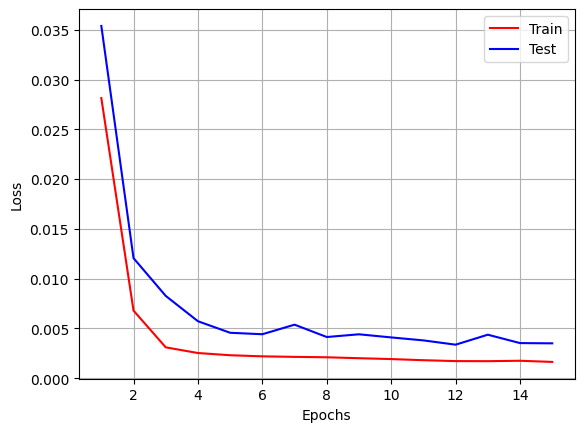

In [31]:
# Plot loss curves
plt.plot(np.linspace(1, num_epochs, num_epochs), train_loss_hist, label='Train', color='red') # Plot train loss
plt.plot(np.linspace(1, num_epochs, num_epochs), val_loss_hist, label='Test', color='blue') # Plot test loss
plt.legend(loc='upper right') # Show legend
plt.xlabel('Epochs') # Show label for X-axis
plt.ylabel('Loss') # Show label for Y-axis
plt.grid(True) # Show grid
plt.show # Show plot

### Task 1.7: Prediction

<function matplotlib.pyplot.show(close=None, block=None)>

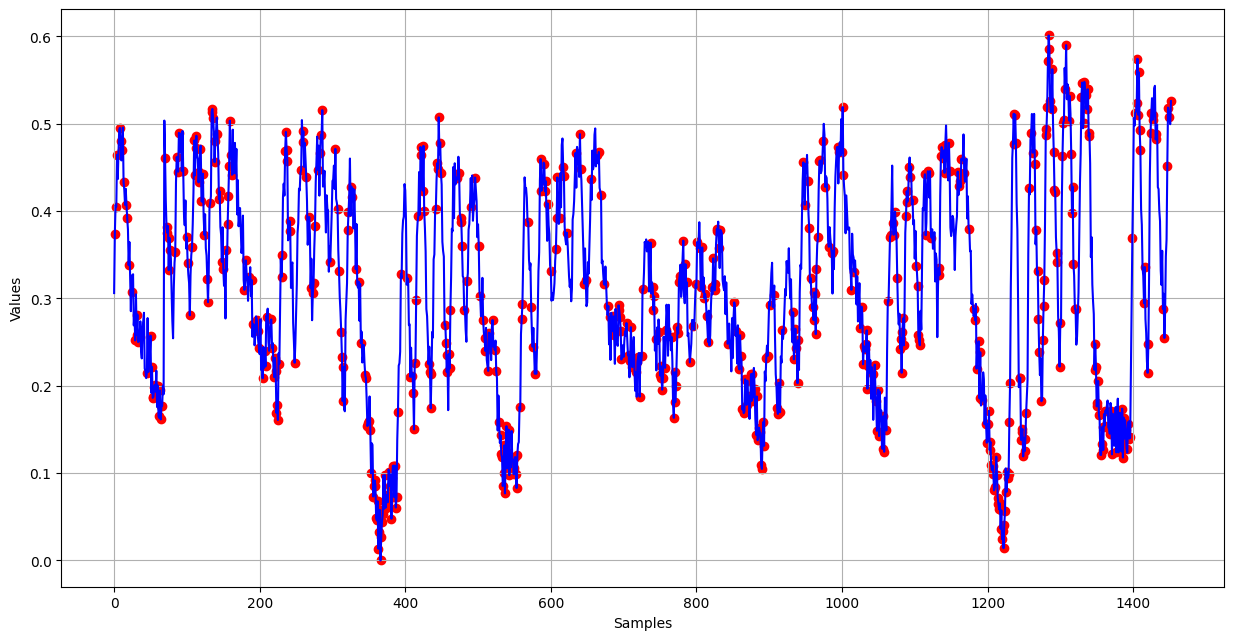

In [32]:
# Predict
model.eval()
predictions = []
with torch.no_grad():
    for inputs, _ in valid_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        predictions.append(outputs.cpu().numpy())
predictions = np.concatenate(predictions)

# Find anomalies
diff = np.abs(y_test - predictions.squeeze())
threshold = 0.25 * np.max(diff)
anomalies = np.where(diff > threshold)[0]
plt.figure(figsize=(15, 7.5))
plt.plot(y_test, color='blue', label='Ground Truth')
plt.scatter(anomalies, y_test[anomalies], color='red', label='Anomalies')
plt.ylabel('Values')
plt.xlabel('Samples')
plt.grid()
plt.show